In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('FinalBalancedDataset.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,Unnamed: 0,Toxicity,tweet
19305,19305,0,strawberry picking for the first time. #strawb...
38117,38117,1,@ileny13 @GiselleMaryy fuck up hoes meaning st...
23077,23077,0,@user #gogirl #summer #camps #cardiff #girls ...
3690,3690,0,@user @user @user i'm fucking micronesian &am...
16276,16276,0,be sure to remind yourself that you woke up to...


## 1. DATA CLEANING 

In [4]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


(56745, 3)

In [5]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [6]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
df.sample(5)

,Toxicity,tweet
643,0,a mother can take care of ten children's but s...
19811,0,our daily dose of motivation! #youplateit #sta...
20502,0,@user do more of what makes you happy! #87...
2710,0,@user i've got a bottle of lovely @user owed t...
47141,1,"RT @Felonious_munk: ""you don't want to get tre..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['Toxicity'] = encoder.fit_transform(df['Toxicity'])

In [10]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
df.isnull().sum()

Toxicity    0
tweet       0
dtype: int64

In [12]:
df.duplicated().sum()

2432

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(54313, 2)

## 2. EDA


In [16]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [17]:
df['Toxicity'].value_counts()

Toxicity
0    30389
1    23924
Name: count, dtype: int64

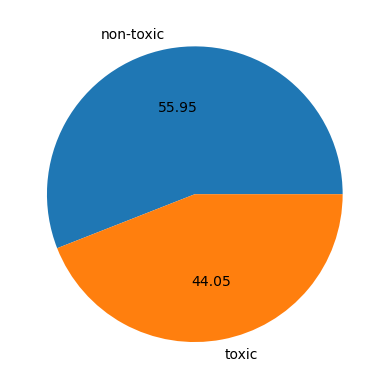

In [18]:
import matplotlib.pyplot as plt

plt.pie(df['Toxicity'].value_counts(), labels =['non-toxic','toxic'],autopct ='%0.2f')
plt.show()

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['tweet'].apply(len)

In [23]:
df['num_words'] = df['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sentences'] = df['tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Toxicity,tweet,num_characters,num_words,num_sentences
0,0,@user when a father is dysfunctional and is s...,102,21,2
1,0,@user @user thanks for #lyft credit i can't us...,122,27,2
2,0,bihday your majesty,21,3,1
3,0,#model i love u take with u all the time in ...,118,18,2
4,0,factsguide: society now #motivation,39,6,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,54313.000000,54313.000000,54313.000000
mean,87.054444,18.966914,1.523742
std,36.781202,9.526343,0.828380
min,5.000000,1.000000,1.000000
25%,58.000000,12.000000,1.000000
50%,88.000000,18.000000,1.000000
75%,113.000000,24.000000,2.000000
max,754.000000,321.000000,42.000000


In [27]:
#of Non-toxic messages
df[df['Toxicity']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,30389.000000,30389.000000,30389.000000
mean,88.809569,18.365724,1.626213
std,33.346733,7.484105,0.881955
min,7.000000,2.000000,1.000000
25%,64.000000,13.000000,1.000000
50%,92.000000,19.000000,1.000000
75%,112.000000,23.000000,2.000000
max,522.000000,274.000000,42.000000


In [28]:
#of toxic messages
df[df['Toxicity']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23924.000000,23924.000000,23924.000000
mean,84.825029,19.730563,1.393580
std,40.619828,11.568929,0.734552
min,5.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,82.000000,18.000000,1.000000
75%,116.000000,26.000000,2.000000
max,754.000000,321.000000,17.000000


In [29]:
import seaborn as sns 

<Figure size 1200x1000 with 0 Axes>

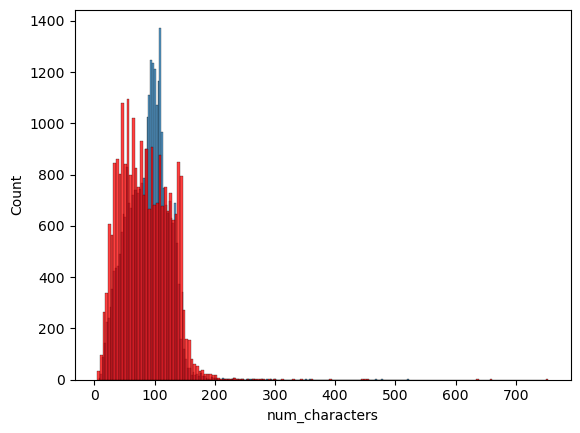

<Figure size 1200x1000 with 0 Axes>

In [30]:
sns.histplot(df[df['Toxicity'] == 0]['num_characters'])
sns.histplot(df[df['Toxicity'] == 1]['num_characters'], color='red')
plt.figure(figsize=(12,10))

## 3. Text Preprocessing

In [31]:
def transform_tweet(tweet):
    tweet = tweet.lower()                 #Lower case
    tweet = nltk.word_tokenize(tweet)     #Tokenization
    
    y =[]
    for i in tweet:
        if i.isalnum():
            y.append(i)                 #Removing special characters
            
    tweet = y[:]
    y.clear()
    
    for i in tweet:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)                 #Removing stopwords and punctuation
    
    tweet = y[:]
    y.clear()
    
    for i in tweet:
        y.append(ps.stem(i))            #Stemming
        
    return " ".join(y)

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords

import string
string.punctuation



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
df['transformed_tweet']  = df['tweet'].apply(transform_tweet)

In [35]:
df.head()

,Toxicity,tweet,num_characters,num_words,num_sentences,transformed_tweet
0,0,@user when a father is dysfunctional and is s...,102,21,2,user father dysfunct selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,122,27,2,user user thank lyft credit ca use caus offer ...
2,0,bihday your majesty,21,3,1,bihday majesti
3,0,#model i love u take with u all the time in ...,118,18,2,model love u take u time
4,0,factsguide: society now #motivation,39,6,1,factsguid societi motiv


In [36]:
%%capture
!pip install wordcloud


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height= 500, min_font_size=10 ,background_color='black')

In [38]:
toxic_wc = wc.generate(df[df['Toxicity']== 1]['transformed_tweet'].str.cat(sep=" "))

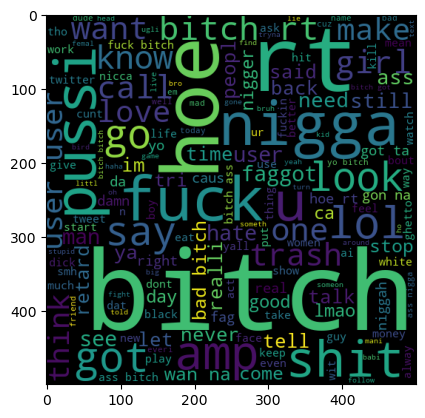

In [39]:
plt.imshow(toxic_wc)

In [40]:
Non_toxic_wc = wc.generate(df[df['Toxicity']== 0]['transformed_tweet'].str.cat(sep=" "))

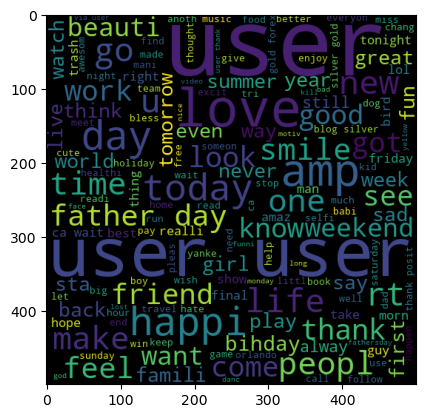

In [41]:
plt.imshow(Non_toxic_wc)

In [42]:
df.head()

,Toxicity,tweet,num_characters,num_words,num_sentences,transformed_tweet
0,0,@user when a father is dysfunctional and is s...,102,21,2,user father dysfunct selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,122,27,2,user user thank lyft credit ca use caus offer ...
2,0,bihday your majesty,21,3,1,bihday majesti
3,0,#model i love u take with u all the time in ...,118,18,2,model love u take u time
4,0,factsguide: society now #motivation,39,6,1,factsguid societi motiv


In [43]:
toxic_corpus =[]
for msg in df[df['Toxicity']==1]['transformed_tweet'].tolist():
    for word in msg.split():
        toxic_corpus.append(word)

In [44]:
len(toxic_corpus)

215503

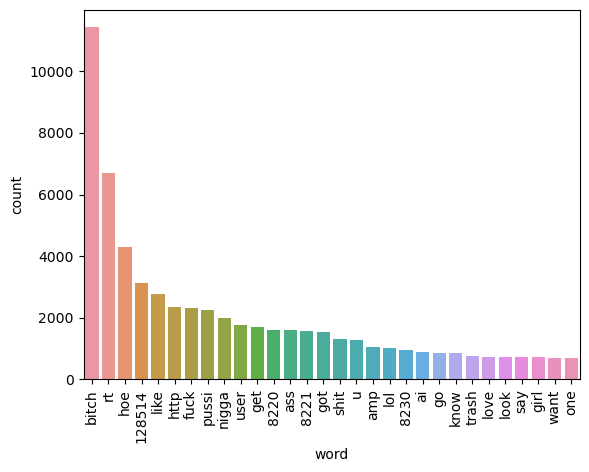

In [45]:
from collections import Counter
toxic_counter = Counter(toxic_corpus).most_common(30)
toxic_df = pd.DataFrame(toxic_counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=toxic_df)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
Non_toxic_corpus =[]
for msg in df[df['Toxicity']==0]['transformed_tweet'].tolist():
    for word in msg.split():
        Non_toxic_corpus.append(word)

len(Non_toxic_corpus)

253942

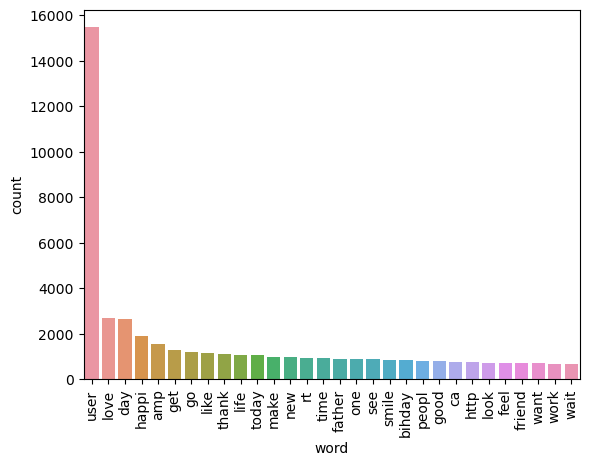

In [47]:
Non_toxic_counter = Counter(Non_toxic_corpus).most_common(30)
Non_toxic_df = pd.DataFrame(Non_toxic_counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=Non_toxic_df)
plt.xticks(rotation='vertical')
plt.show()

## 4.MODEL BUILDING

In [48]:
df.head()

,Toxicity,tweet,num_characters,num_words,num_sentences,transformed_tweet
0,0,@user when a father is dysfunctional and is s...,102,21,2,user father dysfunct selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,122,27,2,user user thank lyft credit ca use caus offer ...
2,0,bihday your majesty,21,3,1,bihday majesti
3,0,#model i love u take with u all the time in ...,118,18,2,model love u take u time
4,0,factsguide: society now #motivation,39,6,1,factsguid societi motiv


In [49]:
# textt Vectorization 
# using Bag Of Words and TFIDF 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [50]:
# X = cv.fit_transform(df['transformed_tweet']).toarray()
X = tfidf.fit_transform(df['transformed_tweet']).toarray()

#here tfidf is performing better for precision 

In [51]:
X.shape

(54313, 3000)

In [52]:
y = df['Toxicity'].values

In [53]:
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size =0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
 


In [57]:
%%capture
!pip install xgboost
from xgboost import XGBClassifier

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth= 5)
lrc = LogisticRegression(solver ='liblinear', penalty ='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state= 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state= 2)
bc = BaggingClassifier(n_estimators = 50, random_state= 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state= 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state= 2)
xgb = XGBClassifier(n_estimators = 50, random_state= 2)

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score =",accuracy_score(y_test,y_pred1))
print("confusion_matrix =",confusion_matrix(y_test,y_pred1))
print("precision_score =",precision_score(y_test,y_pred1))

accuracy_score = 0.7745558317223603
confusion_matrix = [[4097 1980]
 [ 469 4317]]
precision_score = 0.6855645545497856


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score =",accuracy_score(y_test,y_pred2))
print("confusion_matrix =",confusion_matrix(y_test,y_pred2))
print("precision_score =",precision_score(y_test,y_pred2))

accuracy_score = 0.9059191751818099
confusion_matrix = [[5578  499]
 [ 523 4263]]
precision_score = 0.8952120957580848


In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score =",accuracy_score(y_test,y_pred3))
print("confusion_matrix =",confusion_matrix(y_test,y_pred3))
print("precision_score =",precision_score(y_test,y_pred3))

accuracy_score = 0.9154929577464789
confusion_matrix = [[5631  446]
 [ 472 4314]]
precision_score = 0.9063025210084034


In [62]:
clfs ={
    'KN': knc,
    'GNB' : gnb,
    'BNB' : bnb,
    'MNB': mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'Adaboost' : abc, 
    'GBDT' : gbdt,
    'ETC' : etc,
    'xgb' : xgb
}

In [63]:
#defining classifiers for training 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [64]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_scores =[]
precision_scores =[]

for name,clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For',name)
    print('Accuracy =',current_accuracy)
    print('Precision =',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

    


For KN
Accuracy = 0.7666390499861917
Precision = 0.8481286730590782
For GNB
Accuracy = 0.7745558317223603
Precision = 0.6855645545497856
For BNB
Accuracy = 0.9154929577464789
Precision = 0.9063025210084034
For MNB
Accuracy = 0.9059191751818099
Precision = 0.8952120957580848
For DT
Accuracy = 0.870569824173801
Precision = 0.9557713052858684
For LR
Accuracy = 0.9358372456964006
Precision = 0.9643424937542585
For RF
Accuracy = 0.93335174445365
Precision = 0.9356499356499357
For Adaboost
Accuracy = 0.9222130166620639
Precision = 0.9701741827726079
For GBDT
Accuracy = 0.9030654515327258
Precision = 0.9867014341590613
For ETC
Accuracy = 0.9370339685169843
Precision = 0.9378736122971819
For xgb
Accuracy = 0.9280125195618153
Precision = 0.9755344418052256


In [65]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [66]:
performance_df

,Algorithm,Accuracy,Precision
8,GBDT,0.903065,0.986701
10,xgb,0.928013,0.975534
7,Adaboost,0.922213,0.970174
5,LR,0.935837,0.964342
4,DT,0.870570,0.955771
9,ETC,0.937034,0.937874
6,RF,0.933352,0.935650
2,BNB,0.915493,0.906303
3,MNB,0.905919,0.895212
0,KN,0.766639,0.848129


In [67]:
performance_df1 = pd.melt(performance_df ,id_vars = 'Algorithm')

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


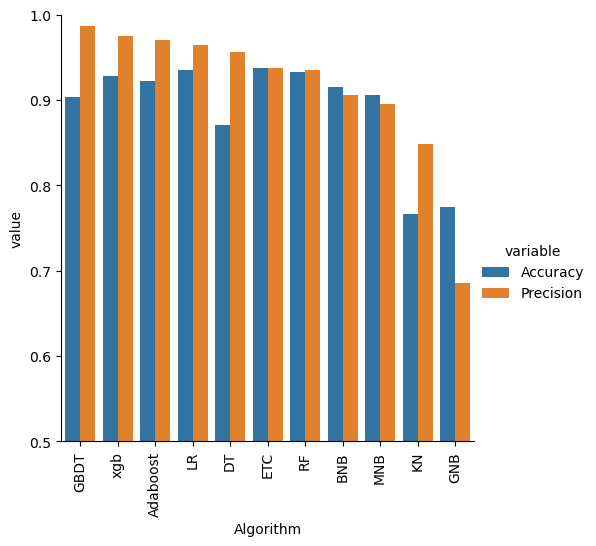

In [68]:
sns.catplot(x= 'Algorithm' , y ='value', hue='variable' , data= performance_df1 ,kind ='bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation ='vertical')
plt.show()

In [69]:
import pickle

In [76]:
pickle.dump(tfidf,open('vectorizer_toxic_classifier.pkl', 'wb'))


In [77]:
pickle.dump(lrc,open('model_toxic_classifier.pkl', 'wb'))

In [78]:
pickle.dump(xgb,open('model_toxic.pkl', 'wb'))